Welcome to the mostly complete pandas cheatsheet of fast data manipulation methods!
Apart from aspiring to be an extensive glossary of your go-to book for fastest methods in Pandas, this is also a gentle introduction to Jupyter notebooks.

In [1]:
import pandas as pd
import time
import random

Pandas reads and writes to a variety of formats. Some of the most popular being CSV, HDF5, SQL tables, Excel etc (in the order of my liking) and CSV is one of the most simplest ones of the lot. 

So, let's begin with a CSV file which contains 14 million NYC taxi cab rides.
At the moment, we care about just about learning enough of pandas to write efficient code, so we will be dwelling on data analysis lesser.

Data source - https://nyctaxitrips.blob.core.windows.net/data/trip_data_9.csv.zip

In [1]:
DATAFILE = "trip_data_9.csv"
df = pd.read_csv(DATAFILE)

/Users/fibinse/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Headsup: A "?" after a python function is a simple way to look up its documentation. Why don't you run the next cell and see for yourself ? 

In [2]:
# let's write a quick timer function. We want it to run a command and then tell us how much time it takes to run it

def timer(fn):
    '''Takes a function, executes it and returns the time taken to exceute it in seconds'''
    start = time.time()
    time_taken = %timeit -oq $fn
    return '%.2f seconds' %time_taken.best

# this function takes a string and executes it. So we can pass any pandas command and see the time elapsed
timer('df["medallion"].unique()')

NameError: global name 'time' is not defined

# 1. know your data

In [ ]:
# What can you learn about your data set and how do you use Pandas to do that.

print "Data has", df.shape[0], 'rows and ', df.shape[1], ' columns'

print "\nThe unqiue columns in the data are : ", df.columns.tolist()

In [ ]:
# each column name seems to have a white spaces in front of it, let's clean that up
df.columns = map(str.strip, df.columns)

`df.columns` gives us the column names in a Python data structure called a `list`. The ideal way to do a common action against all the elements of the list is to use the `map` function. `map` allows a function as the first parameter, which it then applies on each element of the list passed to it as the second parameter.

Try executing `map?` in the next code block.

In [7]:
map?

In [8]:
# lets see the column names now
print df.columns.tolist()

['medallion', 'hack_license', 'vendor_id', 'rate_code', 'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'trip_time_in_secs', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']


We seem to have got the column names rectified.

In [8]:
# We seem to using `df.columns.tolist()` a lot. Let's see how much time it takes. And if there are faster ways to do it.

print "df.columns.tolist() takes ", timer("df.columns.tolist()") 
print "list(df) takes ", timer("list(df)") 

# looks like they take the same amount of time, so let's just go with the shorter `list(df)`

df.columns.tolist() takes  0.00 seconds
list(df) takes  0.00 seconds


You should try the following commands to view different subsets of your data - `df.head()`, `df.tail()`, `df.index` and `df.describe()`. Again: `?` after a function will tell you give the available function documentation, please make the most of it.

In [9]:
# lets introspect the data a bit more
df.head(2)

medallion                      hack_license  \
0  0CF8B9F42FED24FA1CA8AACA36D1A25B  A04B37232EB2478C7A831A6C587C15B4   
1  4D3E527682E42F1FACDFBF2D56757AC6  8C1A6E14ED1D019FBD227970CC619496   

  vendor_id  rate_code store_and_fwd_flag      pickup_datetime  \
0       CMT          1                  N  2013-09-01 16:35:05   
1       CMT          1                  N  2013-09-01 17:44:05   

      dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance  \
0  2013-09-01 16:47:53                2                767            2.6   
1  2013-09-01 17:58:37                1                871            3.5   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  
0        -73.987900        40.724079         -73.994598         40.750580  
1        -74.007866        40.710232         -74.003975         40.756569

In [10]:
# how many unique medallions do we have here
print "df['medallion'].nunique() takes :", timer("df['medallion'].nunique()")

print "\nlen(df['medallion'].unique()) takes:", timer("len(df['medallion'].unique())")

print "\ndf['medallion'].drop_duplicates().size  takes: ", timer("df['medallion'].drop_duplicates().size")

print "\ndf['medallion'].value_counts() takes :", timer("df['medallion'].value_counts().index")

df['medallion'].nunique() takes : 1.41 seconds

len(df['medallion'].unique()) takes: 1.47 seconds

df['medallion'].drop_duplicates().size  takes:  0.80 seconds

df['medallion'].value_counts() takes : 1.57 seconds


looks like `.drop_duplicates()` is the fastest

In [11]:
# so that data has 13438 medallions

print "Total medallions : ", df["medallion"].drop_duplicates().size

Total medallions :  13438


In [12]:
# To see most commonly occuring medallion numbers, we could use one of these options. 

print "df['medallion'].value_counts() takes : ", timer("df['medallion'].value_counts()")

# Let's try adding a new column and then sum it up according to that
df['Count'] = 1
print "\ndf.groupby('medallion').sum()['Count'] takes : ", timer("df.groupby('medallion').sum()['Count']")

df['medallion'].value_counts() takes :  1.81 seconds

df.groupby('medallion').sum()['Count'] takes :  4.72 seconds


# 2. Dicing the data

### Selecting the columns

In [13]:
# How would you select a single column ? Something like df[column_name]

# Now if you wanted to select multiple columns, you could : 
print "df[['trip_distance', 'passenger_count']] took ", timer("df[['trip_distance', 'passenger_count']]")

# or, you could:
print "df.loc[:,'trip_distance': 'passenger_count'] took ", timer("df.loc[:,'trip_distance': 'passenger_count']")

df[['trip_distance', 'passenger_count']] took  0.08 seconds
df.loc[:,'trip_distance': 'passenger_count'] took  0.00 seconds


### Filtering data based on a list of values

In [14]:
# This section will demonstrate ways to slice and dice your data. 
# For example - if we want to get all the rows of the data which have 2 passengers, you could do something like

print "df[df['passenger_count'] == 2]", timer("df[df['passenger_count'] == 2]")

# if we wanted to look for rows which may have one values of a list of values. Let's just pass a single value 
# and see how it times.

print "\ndf[df['passenger_count'].isin([2])]", timer("df[df['passenger_count'].isin([2])]")

# Since, they time close enough, I usually prefer to go the .isin route.

df[df['passenger_count'] == 2] 0.45 seconds

df[df['passenger_count'].isin([2])] 0.47 seconds


### Filtering based on a range

In [15]:
# This is the equivalent of the SQL opertions that give you a bunch of rows between two values
print "df[(df['trip_distance'] > 2) & (df['trip_distance'] <=5)] took", timer("df[(df['trip_distance'] > 2) & (df['trip_distance'] <=5)]")

# Then there is the between function
print "\ndf.trip_distance.between(2, 5, inclusive=True) took ", timer("df.trip_distance.between(2, 5, inclusive=True)")

# Same function as above when inclusive is set to False
print "\ndf.trip_distance.between(2, 5, inclusive=False) took ", timer("df.trip_distance.between(2, 5, inclusive=False)")

# And a query function took
print "\ndf.query('2 < trip_distance < 5') took ", timer("df.query('2 < trip_distance < 5')")

df[(df['trip_distance'] > 2) & (df['trip_distance'] <=5)] took 0.96 seconds

df.trip_distance.between(2, 5, inclusive=True) took  0.06 seconds

df.trip_distance.between(2, 5, inclusive=False) took  0.06 seconds

df.query('2 < trip_distance < 5') took  1.02 seconds


### Converting to datetime

In [16]:
# Let's time the ways to convert datetime columns into timestamps, so that we can then look at ways to slice them
# There are two columns which contain date & time - pickup_datetime, dropoff_datetime
# NOTE: The author would prefer to parse dates while file is being read itself. Pandas provides the parse_date function
# which takes a list of column names which parses columns on data-read. But, since the process cannot be timed, this has not been
# included below.

# Since we would be unable to time it, we have not included another way to conve

print "pd.to_datetime(df['pickup_datetime']) took ", timer("pd.to_datetime(df['pickup_datetime'])")

# Specifying a format can make things even faster
print "pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S') took ", timer("pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')")

# Following commented out because they took longer than 15 seconds
print "df['pickup_datetime'].apply(pd.Timestamp) took  65.83 seconds"
print "df['pickup_datetime'].map(pd.Timestamp) took  65.92 seconds"

pd.to_datetime(df['pickup_datetime']) took  2.56 seconds
pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S') took  2.54 seconds
df['pickup_datetime'].apply(pd.Timestamp) took  65.83 seconds
df['pickup_datetime'].map(pd.Timestamp) took  65.92 seconds


Lets use the fastest of the three methods to convert columns into Datetime format.

In [17]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
df_timeindex = df.set_index('pickup_datetime').sort_index()

### Slice by datetime

Now, you can use `.loc` to slice based on the datetime string

In [18]:
print "df_timeindex.loc['2013-09-01': '2013-10-01', :] took ", timer("df_timeindex.loc['2013-09-01': '2013-10-01', :]")
print "df_timeindex.ix['2013-09-01': '2013-10-01'] took ", timer("df_timeindex.ix['2013-09-01': '2013-10-01']")

# The truncate function below removes data from before and after limits specified
# returns a copy of the data by default but needs a sorted index to work from.

print "df_timeindex.truncate(before=pd.to_datetime('2013-09-02'), after=pd.to_datetime('2013-10-01')) took ", timer("df_timeindex.truncate(before=pd.to_datetime('2013-09-02'), after=pd.to_datetime('2013-10-01'))")

df_timeindex.loc['2013-09-01': '2013-10-01', :] took  0.00 seconds
df_timeindex.ix['2013-09-01': '2013-10-01'] took  0.00 seconds
df_timeindex.truncate(before=pd.to_datetime('2013-09-02'), after=pd.to_datetime('2013-10-01')) took  1.82 seconds


### Selecting by row-column index

 `.iloc` takes slice of row integer index and a column integer index. In the line below, we are selecting 8 rows 
 (from the second till the 10) and the first four columns

In [19]:
df.iloc[2:10, :4]

medallion                      hack_license  \
2  D28DD94BE7682B7434EC5CA4D523A788  96F7564919171F55F551F0F9B96B5199   
3  CFF1FDD049E5433E6FBCC96EDA9E66A5  9BF57AD72288939D6385149524149269   
4  F9B4C49F95496C0EFA6674364F4B54AE  2F8F14718163E0F86E3E4F718A128F2B   
5  F2967DBF707C06314CEB745A83332D62  217B9B441D592C5F8AAA930264BE7F66   
6  9BA35AC8B9018EBCF66913620278FF0E  7769D50E741629E74CEF55CCC14CE09B   
7  DB0D656FD074AC9E5B039E9A5A17F408  13C91816AF95F6514447B72559BEA179   
8  8F832FF1330148CD9C4FBA7EC1D3D99A  ADADC8964B0550C8C240454314A1AB09   
9  6B3D1A9F93C3769EF8F8446DE7CCB9F4  1BD12874047104377287751241BCDA3A   

  vendor_id  rate_code  
2       CMT          1  
3       CMT          1  
4       CMT          1  
5       CMT          1  
6       CMT          1  
7       CMT          1  
8       CMT          1  
9       CMT          1

# 3. Visualisation

Visualisation is a great way to find and convey insights. So, as our next step we will introduce ourselves to the in-the-box methods available to Pandas and use them as we learn & time other facets of Pandas.

We will also look at how we can use the Seaborn package to improve visual appeal and use charts which are not _yet_ available in Pandas.

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

Let's ask some questions about the data set and visualise the answers.

Which is the most "popular" taxi medallion in the data set ? 

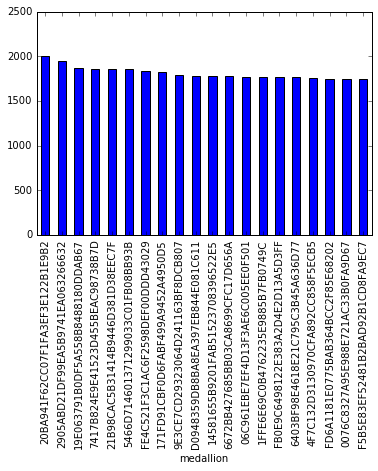

In [21]:
# we will groupby the medallion column and sum up the Count column to get a Pandas series
temp = df.groupby('medallion').sum()['Count']
# let's sort the most medallion numbers by Count. Since Count is the only column we have taken
# we don't need to mention the column name explicitly.
temp = temp.sort_values(ascending=False).head(20)
temp.plot(kind='bar')

You could also make a horizontal bar chart to make the medallion numbers more readable and potentially save your neck.

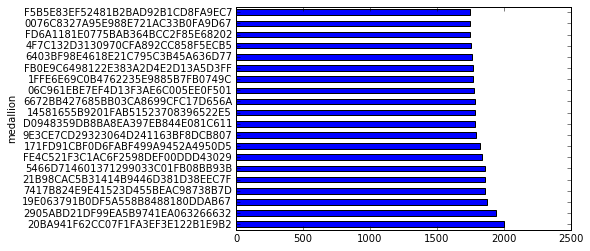

In [22]:
temp.plot(kind='barh')
top_medallions = temp.index

Okay! We are able to not have to crane the neck to read the numbers. But the plot in itself could be way better. 
Let's see how we can improve this chart.

In [23]:
import seaborn as sns
sns.set(context="talk")

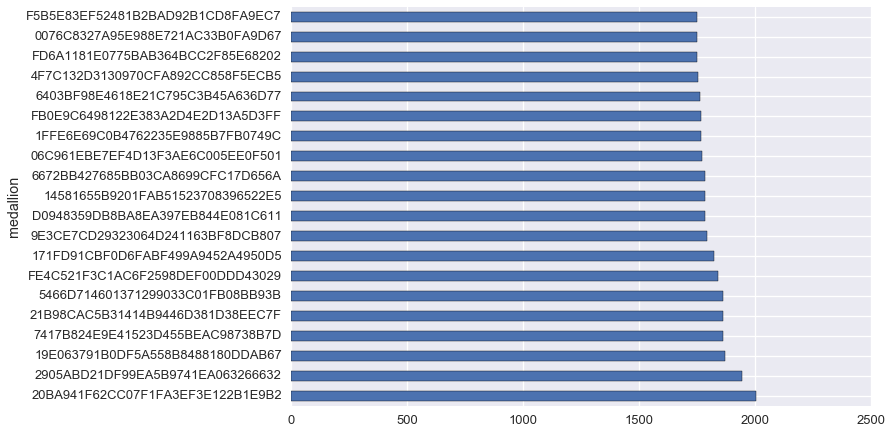

In [24]:
temp.plot(kind='barh')

Ah! Much better. The labels have gotten some breathing room, making them easier to read. Also, the neater gridlines help read the numbers better.

Now, let's see which vendor owns the most number of cabs.

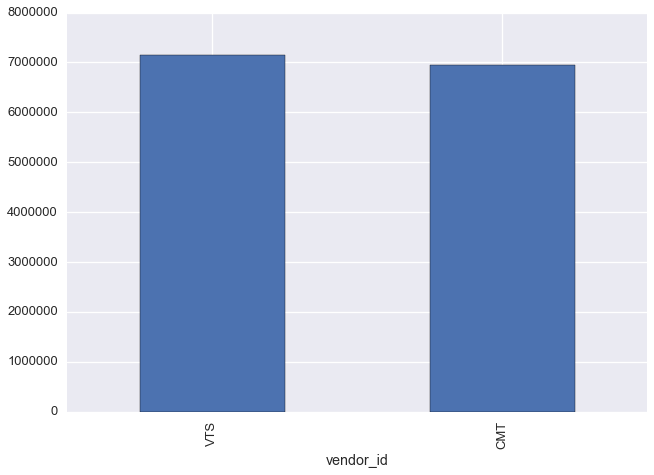

In [25]:
temp = df.groupby('vendor_id').agg({'medallion': pd.np.count_nonzero})
temp = temp['medallion'].sort_values(ascending=False)
temp.plot(kind='bar')

There are apparently just two vendors, and between them VTS seems to have the leading number of cabs.

Next, let's see the scatterplot. This is a good tool to summarise information where each row is characterised by 3-4 values. Below, we will examine the trip patterns of the 20 medallions which are most frequent in the data set.

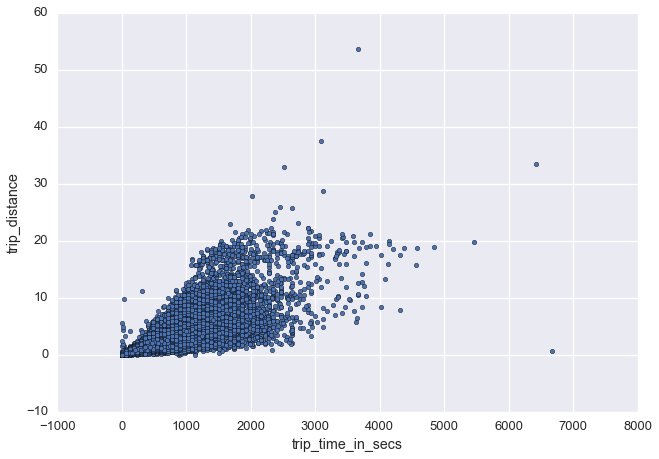

In [26]:
# we will strip down the data set to the top 20 medallions
temp = df[df['medallion'].isin(top_medallions)]
# and plot, trip time on the X-axis and trip_distance in the Y-axis
temp.plot.scatter(x='trip_time_in_secs', y='trip_distance')

As seen above, most of the trips are less than 20 mile long. But how do we characterise "most" here ? 

Let's use a histogram to see the various buckets of  _ "trip_distance" _ s in the data set.

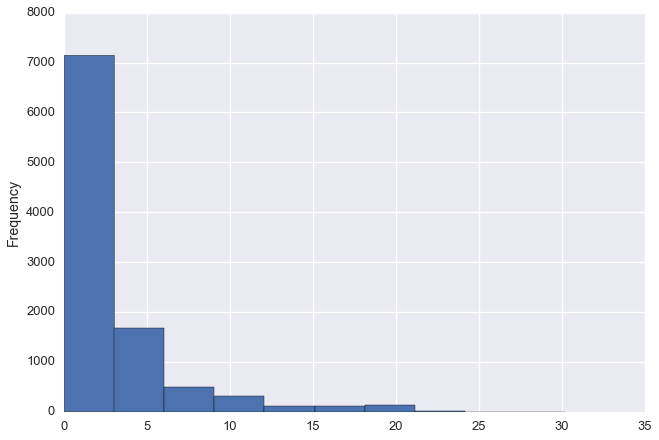

In [27]:
df.trip_distance.head(10000).plot.hist()

Now, as a person looking for a cabbie in the city that never sleeps, what time would be ideal to hail a cab ?

To answer that we would need get classify a trip as a day/night trip and also get the hour of the trip. Let's do that.

In [28]:
# let's first remove all trips which had zero trip time.
df.loc[:,('Hour')] = df.pickup_datetime.dt.hour
df.loc[:,('avg_speed')] = df.trip_distance * 60 * 60/df.trip_time_in_secs
temp = df[df.trip_time_in_secs > 0]

In [29]:
total_trips = temp.groupby('Hour').sum()['Count']
temp = temp.groupby('Hour').mean()

You can add multiple plots into one figure with the 'add_subplot' function. Each axes needs to be told the position of each axes in the figure. 
fig.add_subplot(312) : positions the figure as the second row in a three-row, one-column figure.

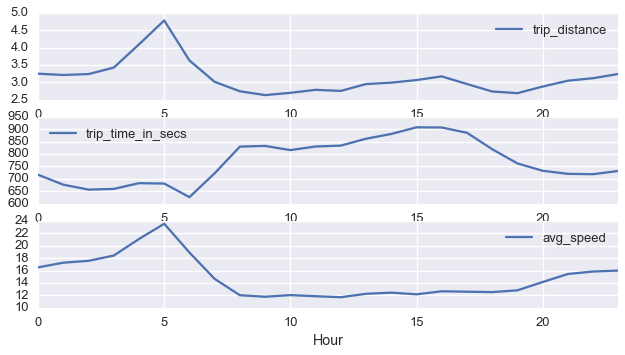

In [30]:
# We create plot holders for the three figures
fig = plt.figure()
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
# ax4 = fig.add_subplot(414)

# we plot a line chart depicting trip_distance as the y-axis and Hour as x-axis (it automatically becomes the x-axis 
# as Hour is the index) 
temp.trip_distance.plot(kind='line', ax=ax1, legend='Trip distance vs Hour')
temp.trip_time_in_secs.plot(kind='line', ax=ax2, legend='Trip time')
temp.avg_speed.plot(kind='line', ax=ax3, legend='Average speed')
# total_trips.plot(kind='line', ax=ax4, legend='number of trips')
plt.show()

The best time to take a cab seems to be around 6AM when the average trip time is the least. 
P.S: Please do not take this information too seriously.  

We can have more fun with the data. Let's see what we can learn with the trip

In [31]:
# Let's make a Day column which will hold the weekday name obtained from the pickup_datetime column
df.loc[:,('DoW')] = df.pickup_datetime.dt.weekday_name

In [32]:
# Let's groupby the Date column
temp = df.groupby('DoW')

# and for every date, let's use the apply function to group by the Hour column and sum up the total trips
temp = temp.apply(lambda v: v.groupby('Hour').sum())['Count']

# We have hourly trip count per day of the month now. Let's reset_index to make Hour and Day, columns.
temp = temp.reset_index()

# Finally, let's pivot it. We want the DoW as columns and Hour as rows, trip counts as values.
temp = temp.pivot('Hour', 'DoW', 'Count')

# Let's make sure we get columns in the same order as the weekdays occur
# we will just reassign the columns in the order that we want them in.
temp = temp['Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday'.split(',')]

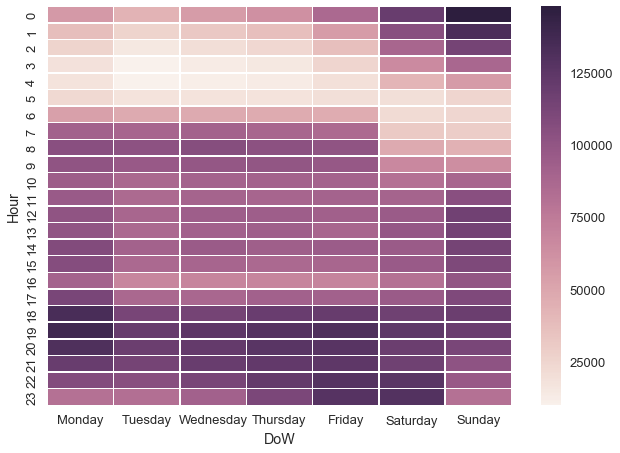

In [33]:
sns.heatmap(temp, fmt="d", linewidths=.5)

New York loves to party till the weekend ends! 

The trip count starts climbing at Friday evening, slows down at Saturday morning. 
This repeats itself on Saturday evening.
Fridays and Saturdays seem to show upward of 1,25,000 trips an hour.
Sunday seems to show a slowdown in trip count.

We are going to employ what we have learnt so far to make visualisations in the upcoming sections.

It's recommended to go through the documentations for both the visualisation packages.

Seaborn  - https://seaborn.github.io/index.html

Pandas visualisation = http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html

# 4. Missing data

Missing data may appear in your dataset natively or may even get introduced as a result of a Pandas operation.

In the current data set for example, if you were to reindex the dataframe with index-values not present in the data, you'd get a null value in place. 

Let's take the first few rows of the data. And, group by Hour. 

In [34]:
temp = df.head()
temp = temp.groupby('Hour').sum()['Count']

We see that there are only 4 unique hours of data.

In [35]:
temp.index

Int64Index([7, 16, 17, 22], dtype='int64', name=u'Hour')

If we were to reindex by Hour with the 24 hours, in a day, Pandas will automatically fill the empty cells with NaN.

In [36]:
temp = temp.reindex(index=range(0,24))
temp

Hour
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     1.0
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    2.0
17    1.0
18    NaN
19    NaN
20    NaN
21    NaN
22    1.0
23    NaN
Name: Count, dtype: float64

### Removing missing data

Pandas provides us with two methods to detect null values - `isnull` and `notnull`. 

You can get indexes of non-null items from a Series like :

In [37]:
temp.index[temp.isnull()]

Int64Index([0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21,
            23],
           dtype='int64', name=u'Hour')

Let's apply these functions to a DataFrame with null values. Let's make a dataframe that contains null values.

We will use random.choice function to choose from a list of values and use a list comprehension to generate it.
Please see that we are using `xrange` function to loop through ten thousand times. Unlike `range` function, it _does not_ create a list of numbers in memory but generates them on demand.

In [38]:
nan_df = pd.DataFrame({'one': [random.choice([0, pd.np.NaN, 2]) for i in xrange(10**6)],
              'two': [random.choice([0, pd.np.NaN, 2]) for i in xrange(10**6)],
              'three': [random.choice([0, pd.np.NaN, 2]) for i in xrange(10**6)],
                    })

In [39]:
nan_df.head()

one  three  two
0  0.0    0.0  2.0
1  2.0    2.0  0.0
2  2.0    2.0  NaN
3  NaN    0.0  0.0
4  0.0    NaN  NaN

The `isnull` method applied directly to the dataframe applies itself to every value and returns a dataframe containing True/False values.

In [40]:
nan_df.head().isnull()

one  three    two
0  False  False  False
1  False  False  False
2  False  False   True
3   True  False  False
4  False   True   True

We could use `isnull` and `notnull` to get only those rows which have null/not-null values as shown below. To continue the culture of this notebook to time every function, let's time these two as well.

In [41]:
print "nan_df[nan_df['one'].notnull()] takes: ", timer("nan_df[nan_df['one'].notnull()]")
print "nan_df[~nan_df['one'].isnull()] takes: ", timer("nan_df[~nan_df['one'].isnull()]")

nan_df[nan_df['one'].notnull()] takes:  0.02 seconds
nan_df[~nan_df['one'].isnull()] takes:  0.02 seconds


They seem to take almost the exact same time.

One thing to note is, by adding a tilde(`~`) in front of a condition, we can negate the condition. 
What we mean is, `~nan_df['one'].isnull()` becomes where column 'one' is _not null_ thanks to the tilde.

### Types of missing values

Null values are represented in a few different ways depending on the dtype of the column.

In [42]:
temp = nan_df.head(10)

Let's change our favourite dataframe `temp` and make one numerical column, one datetime column and a object column.

In [43]:
temp.loc[:,'one'] = 1
temp.loc[:,'two'] = pd.datetime.now()
temp.loc[:,'three'] = 'a'

/Users/fibinse/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/Users/fibinse/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Now, let's change the rows 1,2 and 5 to contain null values, across all the columns.

In [44]:
temp.loc[(1,2,5),:] = pd.np.NaN

You'd notice that rows 1, 2, and 5 of column 'one' store NaNs as NaN itself.
Where as column 'two' which is a datetime column stores it as `NaT`.

In [45]:
temp.head(5)

one three                        two
0  1.0     a 2016-10-22 17:41:51.351307
1  NaN   NaN                        NaT
2  NaN   NaN                        NaT
3  1.0     a 2016-10-22 17:41:51.351307
4  1.0     a 2016-10-22 17:41:51.351307

Now, let's assign a None value to the third row

In [46]:
temp.loc[3,:] = None

Notice how Pandas stores `None` as `NaN` in the numeric column 'one', as-is in the object column and as `NaT` in the datetime column.

In [47]:
temp.head()

one three                        two
0  1.0     a 2016-10-22 17:41:51.351307
1  NaN   NaN                        NaT
2  NaN   NaN                        NaT
3  NaN  None                        NaT
4  1.0     a 2016-10-22 17:41:51.351307

We have learnt how null values are stored. 

But before we move on to understand how we can deal with them, it would be a good idea to write a function which gives us a visual summary of the null values in a dataframe, for the purposes of our future analysis.

In [48]:
def visualise_nulls(df):
    '''
        Takes a DataFrame as input and prints a horizontal bar graph
        of null values.
    '''
    fig = plt.figure()
    ax = plt.subplot(111)
    maxrows, maxcolumns = df.shape
    values = []
    for column in list(df):
        null_values = df[df[column].isnull()].shape[0]
        values.append([null_values, maxrows])

    ax.legend(bbox_to_anchor=(.5, .5), loc='top right')
    pd.DataFrame(values, index=list(df), columns=['Nulls', 'Max Row size']).plot(kind='barh', figsize=(10,8), ax=ax)

/Users/fibinse/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


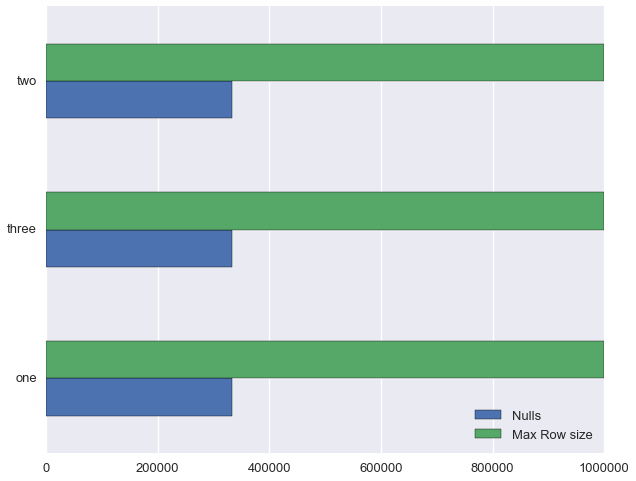

In [49]:
visualise_nulls(nan_df)

As you will notice quite a sizeable rows of each column in the `temp` dataframe is filled with null values.

Let's pass some real data through the visualisation function and see what we find.

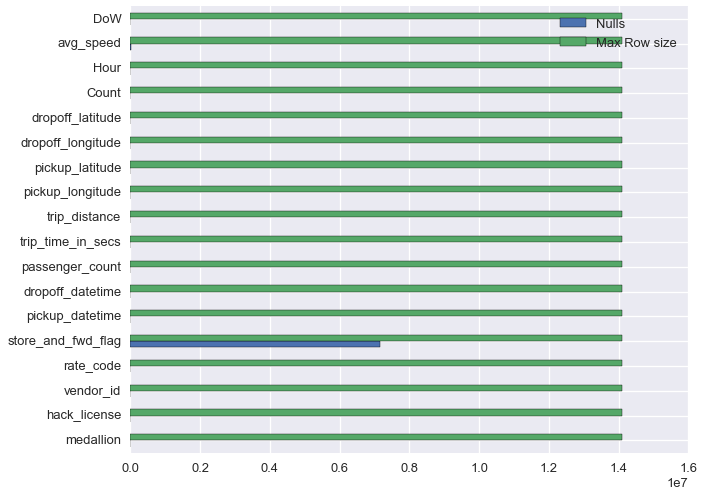

In [50]:
visualise_nulls(df)

As we see, a tiny percentage of 'avg_speed' column and a sizeable chunk of the 'store_and_fwd_flag' is filled with null values.

### Working with missing data

If you have null data in your data, you can either remove that data or you can fill the null values with an appropriate value. Let's discuss this.

#### Filling missing data

The `fillna` method replaces the missing data with the value that is passed to it.

In [51]:
temp.fillna('missing value')

one          three                         two
0              1              a  2016-10-22 17:41:51.351307
1  missing value  missing value               missing value
2  missing value  missing value               missing value
3  missing value  missing value               missing value
4              1              a  2016-10-22 17:41:51.351307
5  missing value  missing value               missing value
6              1              a  2016-10-22 17:41:51.351307
7              1              a  2016-10-22 17:41:51.351307
8              1              a  2016-10-22 17:41:51.351307
9              1              a  2016-10-22 17:41:51.351307

`fillna` also has an argument `method` which let's use forward-fill/backward-fill values.

You can either fill the missing data with a value or use the `method` argument to forward fill/backward-fill with an existing value. 

While using `method` argument, you could pass on a integer value to the `limit` argument to fill as many missing values. 

In [52]:
temp.fillna(method='ffill', limit=2)

one three                        two
0  1.0     a 2016-10-22 17:41:51.351307
1  1.0     a 2016-10-22 17:41:51.351307
2  1.0     a 2016-10-22 17:41:51.351307
3  NaN  None                        NaT
4  1.0     a 2016-10-22 17:41:51.351307
5  1.0     a 2016-10-22 17:41:51.351307
6  1.0     a 2016-10-22 17:41:51.351307
7  1.0     a 2016-10-22 17:41:51.351307
8  1.0     a 2016-10-22 17:41:51.351307
9  1.0     a 2016-10-22 17:41:51.351307

`limit=1` fills only the first missing value with the last value before/after it.

In [53]:
temp.fillna(method='ffill', limit=1)

one three                        two
0  1.0     a 2016-10-22 17:41:51.351307
1  1.0     a 2016-10-22 17:41:51.351307
2  NaN   NaN                        NaT
3  NaN  None                        NaT
4  1.0     a 2016-10-22 17:41:51.351307
5  1.0     a 2016-10-22 17:41:51.351307
6  1.0     a 2016-10-22 17:41:51.351307
7  1.0     a 2016-10-22 17:41:51.351307
8  1.0     a 2016-10-22 17:41:51.351307
9  1.0     a 2016-10-22 17:41:51.351307

# 5. Grouping by 

There will be times when you want to group your dataframe by an axis and aggregate it across multiple columns differently. Here is where `.groupby` comes to your rescue. Let's see how this goes - 

In [74]:
# Let's group by the column `medallion`
temp = df.head(10).groupby('medallion')

The `.groups` method returns all the group names and their labels in a dictionary form.

In [75]:
temp.groups

{'0CF8B9F42FED24FA1CA8AACA36D1A25B': [0],
 '4D3E527682E42F1FACDFBF2D56757AC6': [1],
 '6B3D1A9F93C3769EF8F8446DE7CCB9F4': [9],
 '8F832FF1330148CD9C4FBA7EC1D3D99A': [8],
 '9BA35AC8B9018EBCF66913620278FF0E': [6],
 'CFF1FDD049E5433E6FBCC96EDA9E66A5': [3],
 'D28DD94BE7682B7434EC5CA4D523A788': [2],
 'DB0D656FD074AC9E5B039E9A5A17F408': [7],
 'F2967DBF707C06314CEB745A83332D62': [5],
 'F9B4C49F95496C0EFA6674364F4B54AE': [4]}

If you wanted to know only the group names, you could do that by:

In [76]:
temp.groups.keys()

['9BA35AC8B9018EBCF66913620278FF0E',
 '6B3D1A9F93C3769EF8F8446DE7CCB9F4',
 'CFF1FDD049E5433E6FBCC96EDA9E66A5',
 'F2967DBF707C06314CEB745A83332D62',
 'F9B4C49F95496C0EFA6674364F4B54AE',
 'D28DD94BE7682B7434EC5CA4D523A788',
 '0CF8B9F42FED24FA1CA8AACA36D1A25B',
 '4D3E527682E42F1FACDFBF2D56757AC6',
 'DB0D656FD074AC9E5B039E9A5A17F408',
 '8F832FF1330148CD9C4FBA7EC1D3D99A']

Let's time the directly available aggregation functions and measure the time actually taken.

In [57]:
print "temp.mean() takes: ", timer("temp.mean()"), temp.mean().shape
print "temp.median() takes: ", timer("temp.median()"), temp.median().shape
print "temp.min() takes: ", timer("temp.min()"), temp.min().shape
print "temp.max() takes: ", timer("temp.max()"), temp.max().shape

temp.mean() takes:  1.15 seconds (13438, 11)
temp.median() takes:  4.84 seconds (13438, 11)
temp.min() takes:  55.98 seconds (13438, 17)
temp.max() takes: 

KeyboardInterrupt: 

In [79]:
temp = df.groupby('medallion').get_group('00005007A9F30E289E760362F69E4EAD')

Let's take the data of one medallion and look at the other facets of `.groupby` functionality.

In [80]:
temp.shape

(1475, 18)

### Aggregation

`.agg` or `.aggregate` functions let you aggregate a DataFrame across a column/multiple columns.

Let's see the example below:

For the column, 'hack_license', we are passing a dictionary `{'no_of_times':'count'}`, so Pandas will aggregate by 'count' and provide the result under the label 'no_of_times'.

If you were to just mention how you want to aggregate by a column, you could just pass `'rate_code': pd.np.sum,` in the dictionary as argument to aggregate with.

You could also aggregate through the same column in multiple ways, as shown for 'pickup_datetime' and get multiple columns as a result.

In [85]:
aggregations = {
    'hack_license': {'no_of_times':'count'},
    'rate_code': pd.np.sum,
    'pickup_datetime': {
        'min_pickup_date': lambda v: v.dropna().min(),
        'max_pickup_date': 'max',
    }
}
df.head(1200).groupby('medallion').aggregate(aggregations).head()

rate_code     pickup_datetime  \
                                       sum     min_pickup_date   
medallion                                                        
0053334C798EC6C8E637657962030F99         1 2013-09-09 00:11:00   
00790C7BAD30B7A9E09689A13ED90042         1 2013-09-13 06:36:00   
00EEA9525C3C7B6DF582BFBDBB938A7D        28 2013-09-02 14:27:00   
00FD1D146C1899CEDB738490659CAD30         1 2013-09-09 07:08:00   
011D4D788982F461B5CEC68008AD5D10        27 2013-09-02 13:00:00   

                                                     hack_license  
                                     max_pickup_date  no_of_times  
medallion                                                          
0053334C798EC6C8E637657962030F99 2013-09-09 00:11:00            1  
00790C7BAD30B7A9E09689A13ED90042 2013-09-13 06:36:00            1  
00EEA9525C3C7B6DF582BFBDBB938A7D 2013-09-08 20:27:00           28  
00FD1D146C1899CEDB738490659CAD30 2013-09-09 07:08:00            1  
011D4D788982F461B5CEC68008AD5D10 2013-09-06 20:27:00           22

### TODO: Transform

The `.transform` function is often confused with the `.apply` function.

Difference betweent the two lies in the fact that `.apply` when applied on a group-by, it acts on the DataFrame group as a whole. While `.transform` works on the individual columns of the DataFrame **one at a time** and not the DataFrame as a whole.

Let's say you want to count the number of unique hack licenses which have appeared against each medallion. 

In [132]:
# temp = df.copy().head(1000)

# You can do that with the transform function below - 

# print "Transform function takes: ", timer("temp.groupby('medallion')['hack_license'].transform(lambda v: v.size)")

# And, with the `apply` function like shown here - 

# print "Column reduction using apply function takes: ", timer("temp.groupby('medallion').apply(lambda v: v['hack_license'].nunique())")

# Observe how we are able to access the column by name within `apply` function. This is what primarily differentiates `.apply` and `.transform`.

# temp.groupby('medallion')[['rate_code', 'passenger_count']].transform(sum).reset_index()

### Common operations after group-by

#### UNSTACK

One scenario when we could unstack is when we would like to compare a metric across groups. For example, say, we want to compare vendors across passenger count, trip time and trip distance. We would groupby the 'vendor_id' and aggregate it with `mean`.

In [152]:
temp_df = temp.groupby(['vendor_id']).mean()[['passenger_count', 'trip_time_in_secs', 'trip_distance']]

And, then simply unstack it.

In [156]:
temp_df.unstack()

                   vendor_id
passenger_count    CMT            1.259494
                   VTS            2.393112
trip_time_in_secs  CMT          668.158228
                   VTS          689.073634
trip_distance      CMT            3.041772
                   VTS            2.993456
dtype: float64

If you were to groupby by multiple columns, `unstack` lets use pass a level to make columns from.

In [157]:
temp_df = temp.groupby(['vendor_id', 'rate_code']).mean()[['passenger_count', 'trip_time_in_secs', 'trip_distance']]
temp_df.unstack(level=0)

passenger_count           trip_time_in_secs               \
vendor_id             CMT       VTS               CMT          VTS   
rate_code                                                            
1                 1.25974  2.397546        630.792208   643.361963   
2                 1.25000  2.181818       2106.750000  2378.181818   
3                     NaN  3.000000               NaN   870.000000   
5                     NaN  2.333333               NaN   600.000000   

          trip_distance             
vendor_id           CMT        VTS  
rate_code                           
1              2.646753   2.544086  
2             18.250000  18.830909  
3                   NaN   9.405000  
5                   NaN   4.656667

#### Stack

Stack let's you _stack_ columns like rows. Let me explain - 

When you unstack, you get this - 

In [164]:
temp_df.unstack()

passenger_count                          trip_time_in_secs  \
rate_code               1         2    3         5                 1   
vendor_id                                                              
CMT              1.259740  1.250000  NaN       NaN        630.792208   
VTS              2.397546  2.181818  3.0  2.333333        643.361963   

                                     trip_distance                              
rate_code            2      3      5             1          2      3         5  
vendor_id                                                                       
CMT        2106.750000    NaN    NaN      2.646753  18.250000    NaN       NaN  
VTS        2378.181818  870.0  600.0      2.544086  18.830909  9.405  4.656667

And, when you stack it, you get - 

In [165]:
temp_df.stack()

vendor_id  rate_code                   
CMT        1          passenger_count         1.259740
                      trip_time_in_secs     630.792208
                      trip_distance           2.646753
           2          passenger_count         1.250000
                      trip_time_in_secs    2106.750000
                      trip_distance          18.250000
VTS        1          passenger_count         2.397546
                      trip_time_in_secs     643.361963
                      trip_distance           2.544086
           2          passenger_count         2.181818
                      trip_time_in_secs    2378.181818
                      trip_distance          18.830909
           3          passenger_count         3.000000
                      trip_time_in_secs     870.000000
                      trip_distance           9.405000
           5          passenger_count         2.333333
                      trip_time_in_secs     600.000000
                      tri

Things will become clearer when you observe the columns in the DataFrame we are using - 

In [168]:
temp_df.head()

passenger_count  trip_time_in_secs  trip_distance
vendor_id rate_code                                                   
CMT       1                 1.259740         630.792208       2.646753
          2                 1.250000        2106.750000      18.250000
VTS       1                 2.397546         643.361963       2.544086
          2                 2.181818        2378.181818      18.830909
          3                 3.000000         870.000000       9.405000

#### DESCRIBE

You can use the `describe` method to know more about your groups

In [174]:
temp = df.head(10).groupby('medallion')

In [179]:
temp.describe().unstack()

Count                                    \
                                 count mean std  min  25%  50%  75%  max   
medallion                                                                  
0CF8B9F42FED24FA1CA8AACA36D1A25B   1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0   
4D3E527682E42F1FACDFBF2D56757AC6   1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0   
6B3D1A9F93C3769EF8F8446DE7CCB9F4   1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0   
8F832FF1330148CD9C4FBA7EC1D3D99A   1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0   
9BA35AC8B9018EBCF66913620278FF0E   1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0   
CFF1FDD049E5433E6FBCC96EDA9E66A5   1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0   
D28DD94BE7682B7434EC5CA4D523A788   1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0   
DB0D656FD074AC9E5B039E9A5A17F408   1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0   
F2967DBF707C06314CEB745A83332D62   1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0   
F9B4C49F95496C0EFA6674364F4B54AE   1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0   

                                  Hour         ...   trip_distance       \
                                 count  mean   ...             75%  max   
medallion                                      ...                        
0CF8B9F42FED24FA1CA8AACA36D1A25B   1.0  16.0   ...             2.6  2.6   
4D3E527682E42F1FACDFBF2D56757AC6   1.0  17.0   ...             3.5  3.5   
6B3D1A9F93C3769EF8F8446DE7CCB9F4   1.0  17.0   ...             2.8  2.8   
8F832FF1330148CD9C4FBA7EC1D3D99A   1.0  20.0   ...             2.2  2.2   
9BA35AC8B9018EBCF66913620278FF0E   1.0  20.0   ...             9.9  9.9   
CFF1FDD049E5433E6FBCC96EDA9E66A5   1.0   7.0   ...             9.6  9.6   
D28DD94BE7682B7434EC5CA4D523A788   1.0  16.0   ...             3.1  3.1   
DB0D656FD074AC9E5B039E9A5A17F408   1.0  23.0   ...             3.9  3.9   
F2967DBF707C06314CEB745A83332D62   1.0  23.0   ...             8.3  8.3   
F9B4C49F95496C0EFA6674364F4B54AE   1.0  22.0   ...             1.5  1.5   

                                 trip_time_in_secs                      \
                                             count    mean std     min   
medallion                                                                
0CF8B9F42FED24FA1CA8AACA36D1A25B               1.0   767.0 NaN   767.0   
4D3E527682E42F1FACDFBF2D56757AC6               1.0   871.0 NaN   871.0   
6B3D1A9F93C3769EF8F8446DE7CCB9F4               1.0  1024.0 NaN  1024.0   
8F832FF1330148CD9C4FBA7EC1D3D99A               1.0   671.0 NaN   671.0   
9BA35AC8B9018EBCF66913620278FF0E               1.0  1006.0 NaN  1006.0   
CFF1FDD049E5433E6FBCC96EDA9E66A5               1.0   869.0 NaN   869.0   
D28DD94BE7682B7434EC5CA4D523A788               1.0   872.0 NaN   872.0   
DB0D656FD074AC9E5B039E9A5A17F408               1.0   787.0 NaN   787.0   
F2967DBF707C06314CEB745A83332D62               1.0  1113.0 NaN  1113.0   
F9B4C49F95496C0EFA6674364F4B54AE               1.0   468.0 NaN   468.0   

                                                                  
                                     25%     50%     75%     max  
medallion                                                         
0CF8B9F42FED24FA1CA8AACA36D1A25B   767.0   767.0   767.0   767.0  
4D3E527682E42F1FACDFBF2D56757AC6   871.0   871.0   871.0   871.0  
6B3D1A9F93C3769EF8F8446DE7CCB9F4  1024.0  1024.0  1024.0  1024.0  
8F832FF1330148CD9C4FBA7EC1D3D99A   671.0   671.0   671.0   671.0  
9BA35AC8B9018EBCF66913620278FF0E  1006.0  1006.0  1006.0  1006.0  
CFF1FDD049E5433E6FBCC96EDA9E66A5   869.0   869.0   869.0   869.0  
D28DD94BE7682B7434EC5CA4D523A788   872.0   872.0   872.0   872.0  
DB0D656FD074AC9E5B039E9A5A17F408   787.0   787.0   787.0   787.0  
F2967DBF707C06314CEB745A83332D62  1113.0  1113.0  1113.0  1113.0  
F9B4C49F95496C0EFA6674364F4B54AE   468.0   468.0   468.0   468.0  

[10 rows x 88 columns]

Comparing the max trip distance of the medallion taxis wouldbe like - 

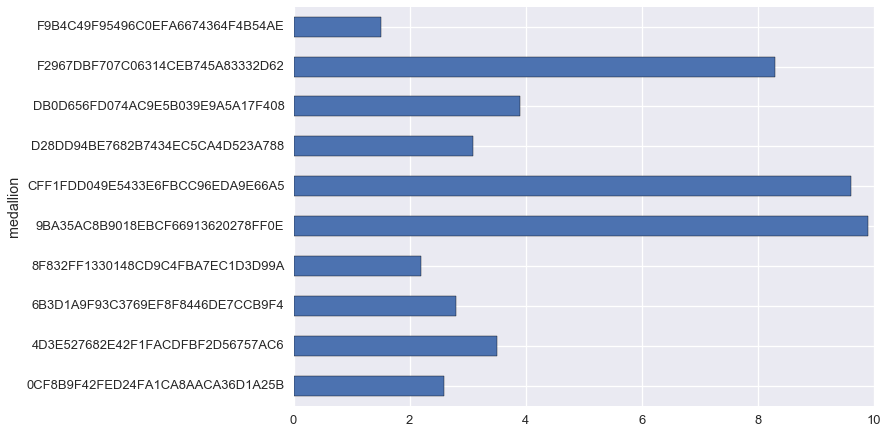

In [183]:
temp.describe().unstack().loc[:,('trip_distance', 'max')].plot(kind='barh')

#### ADD_PREFIX

Instead of renaming the aggregated dataframe after a groupby operation, you could use the `add_prefix` operation to rename the columns.

In [3]:
df.head(100).groupby('medallion').mean().add_prefix('mean_').head()

mean_ rate_code  mean_ passenger_count  \
medallion                                                                  
022562E7A0FEB7A9D4A31B06BF0B82E8              1.0                    1.0   
040D8BEC832C494FA4EBED53768CFD4C              1.0                    1.0   
0656C4136113432E5D0F1200BD7B0ED7              1.0                    1.0   
0C5296F3C8B16E702F8F2E06F5106552              1.0                    1.0   
0CF8B9F42FED24FA1CA8AACA36D1A25B              1.0                    2.0   

                                  mean_ trip_time_in_secs  \
medallion                                                   
022562E7A0FEB7A9D4A31B06BF0B82E8                    228.0   
040D8BEC832C494FA4EBED53768CFD4C                   1005.0   
0656C4136113432E5D0F1200BD7B0ED7                   1860.0   
0C5296F3C8B16E702F8F2E06F5106552                    790.0   
0CF8B9F42FED24FA1CA8AACA36D1A25B                    767.0   

                                  mean_ trip_distance  mean_ pickup_longitude  \
medallion                                                                       
022562E7A0FEB7A9D4A31B06BF0B82E8                  0.8              -73.979286   
040D8BEC832C494FA4EBED53768CFD4C                  2.9              -73.951576   
0656C4136113432E5D0F1200BD7B0ED7                  9.1              -73.863640   
0C5296F3C8B16E702F8F2E06F5106552                  2.7              -73.974327   
0CF8B9F42FED24FA1CA8AACA36D1A25B                  2.6              -73.987900   

                                  mean_ pickup_latitude  \
medallion                                                 
022562E7A0FEB7A9D4A31B06BF0B82E8              40.739658   
040D8BEC832C494FA4EBED53768CFD4C              40.741520   
0656C4136113432E5D0F1200BD7B0ED7              40.769920   
0C5296F3C8B16E702F8F2E06F5106552              40.743904   
0CF8B9F42FED24FA1CA8AACA36D1A25B              40.724079   

                                  mean_ dropoff_longitude  \
medallion                                                   
022562E7A0FEB7A9D4A31B06BF0B82E8               -73.978127   
040D8BEC832C494FA4EBED53768CFD4C               -73.971893   
0656C4136113432E5D0F1200BD7B0ED7               -73.967384   
0C5296F3C8B16E702F8F2E06F5106552               -74.006973   
0CF8B9F42FED24FA1CA8AACA36D1A25B               -73.994598   

                                  mean_ dropoff_latitude  
medallion                                                 
022562E7A0FEB7A9D4A31B06BF0B82E8               40.748402  
040D8BEC832C494FA4EBED53768CFD4C               40.765099  
0656C4136113432E5D0F1200BD7B0ED7               40.798637  
0C5296F3C8B16E702F8F2E06F5106552               40.740772  
0CF8B9F42FED24FA1CA8AACA36D1A25B               40.750580

## 6. Multi-indexing

A multi-index is just what it is read as, a multiple index. There can be created with various Python methods  explicitly and these also occur as a result of a `.groupby`, `.merge` (we will be discussing this soon) and other such operations.

Let's aggregate our favourite columns, 'medallion' and 'hack_license', observe its index.
`.sum` aggregates our grouped DataFrame and prints out the index.

In [9]:
temp = df.head(100).groupby(['medallion', 'hack_license']).sum().index

The type of the index is of MultiIndex

In [10]:
type(temp)

pandas.indexes.multi.MultiIndex

Let's see what a Multi-index look like:

In [11]:
temp.tolist()[:2]

[('022562E7A0FEB7A9D4A31B06BF0B82E8', 'B706829B6520B5C6A15EF434DDE3A8D4'),
 ('040D8BEC832C494FA4EBED53768CFD4C', '69ABC2D581D53C940263EEF06A1BF6EE')]

As we see, the multi-index is basically an array of tuples, where the combination of each of the combinations is unique. Earlier, we had stated that there are explicit Python functions that generate such array of tuples.

These return a MultiIndex object (which is nothing but a hierarchial Index object):

1. `pd.MultiIndex.from_tuples`, takes an array of tuples and names of the index levels.

2. `pd.MultiIndex.from_product`, takes a list of lists, and creates an index with every combination of the lists passed. Let's see how that works below.

In [5]:
iterables = [['Fiat', 'Citroen', 'Puegeot'], ['Petrol', 'Diesel'], ['Europe', 'Rest of the World']]
ind = pd.MultiIndex.from_product(iterables, names=['Manufacturer', 'Engine Type', 'Geography'])

In [6]:
list_of_values = pd.Series(np.random.randn(12), index=ind)
list_of_values

Manufacturer  Engine Type  Geography        
Fiat          Petrol       Europe               0.897292
                           Rest of the World    0.619647
              Diesel       Europe              -0.069696
                           Rest of the World   -0.796698
Citroen       Petrol       Europe              -0.976738
                           Rest of the World   -0.390676
              Diesel       Europe               0.013190
                           Rest of the World   -0.821640
Puegeot       Petrol       Europe               0.689430
                           Rest of the World    0.764132
              Diesel       Europe               0.563199
                           Rest of the World   -0.394786
dtype: float64

One thing to notice here is the ordering of the indexes. We have every unique combination of the list values that we have passed to the `pd.MultiIndex.from_product` but its in left to right order. That is, to access these you have to specify a 'Manufacturer' and then the subsequent labels.

It will become clearer with the example below - 

In [7]:
list_of_values.xs(('Fiat', 'Petrol'))

/Users/fibinse/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py:370: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


Geography
Europe               0.897292
Rest of the World    0.619647
dtype: float64

You may also want to filter by values across multiple indexes, in which case, use `.loc`

In [18]:
list_of_values.loc['Fiat',:, 'Europe']

Engine Type
Petrol    0.897292
Diesel   -0.069696
dtype: float64

# 7. The art of combining dataframes